### Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("bank-dataset.csv")

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [4]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,jul,659,3,-1,0,unknown,no
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,nov,208,1,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


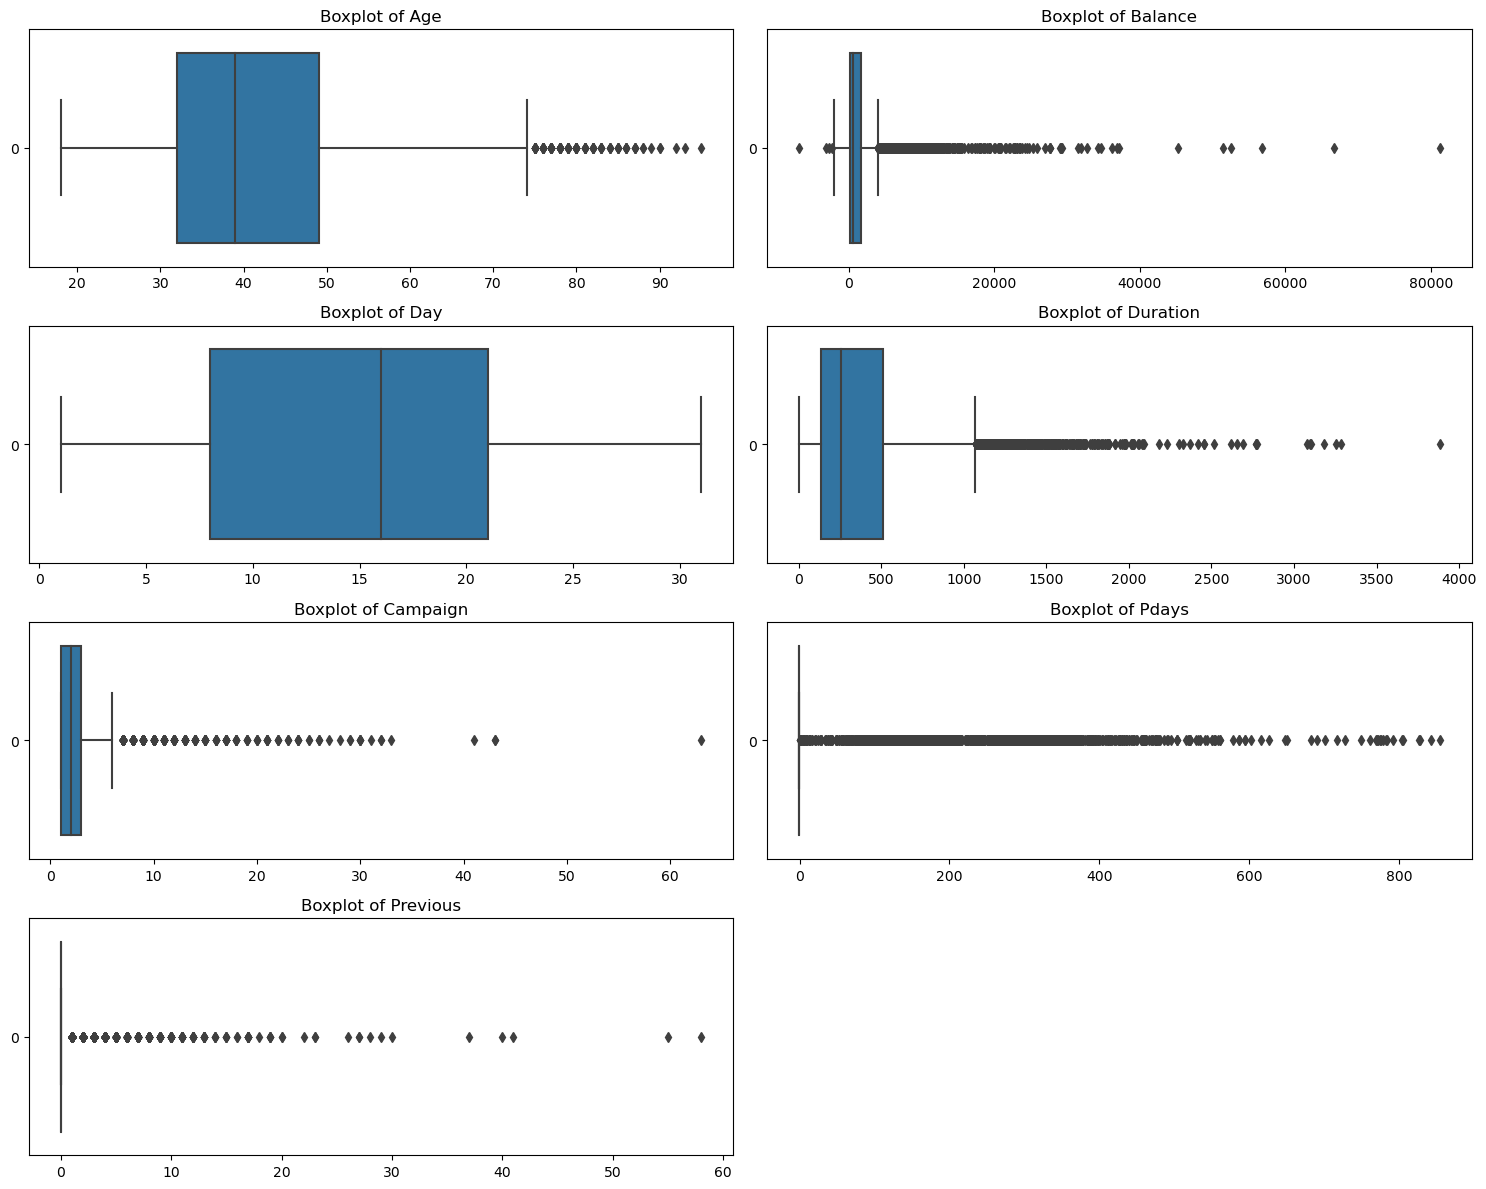

In [58]:
# Subsetting numeric columns
numeric_df = d.select_dtypes(include=['float', 'int'])

# Boxplots for numeric data
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
ax = ax.flatten()
numeric_col_iter = iter(numeric_df.columns.to_list())

for axis in list(ax):
    try:
        column_name = next(numeric_col_iter)
        sns.boxplot(data=numeric_df[column_name], ax=axis, orient='h')
        axis.set_title(f"Boxplot of {column_name.title()}")

    except StopIteration:
        axis.remove()

plt.tight_layout()

<Axes: xlabel='age', ylabel='Density'>

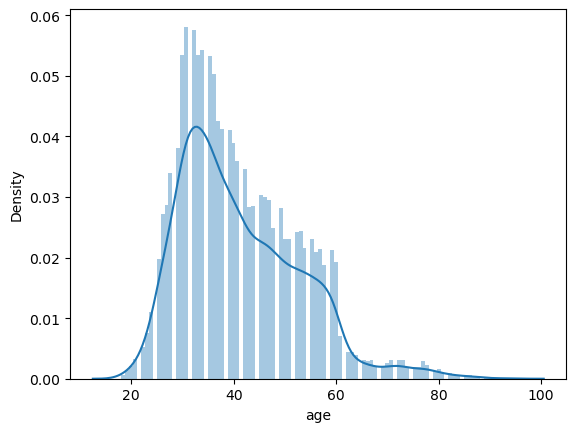

In [60]:
#Distribution of Age
sns.distplot(df.age, bins=100)

<Axes: xlabel='duration', ylabel='Density'>

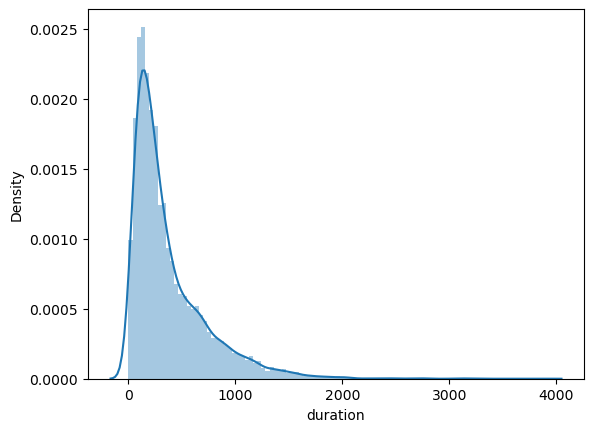

In [61]:
#Visualizing the distribution of the 'duration' column
sns.distplot(df.duration, bins=100)

In [19]:
#Copy for parsing
bank_data = df.copy()

In [20]:
#Exploring People who made a deposit Vs Job category
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job ==j)])))

management      :  1143
blue-collar     :   666
technician      :   758
admin.          :   561
services        :   337
retired         :   444
self-employed   :   168
student         :   228
unemployed      :   171
entrepreneur    :   117
housemaid       :    97
unknown         :    30


In [21]:
#Different types of job categories and their counts
bank_data.job.value_counts()

job
management       2339
blue-collar      1883
technician       1709
admin.           1245
services          887
retired           696
self-employed     379
unemployed        324
entrepreneur      318
student           313
housemaid         259
unknown            65
Name: count, dtype: int64

In [22]:
#Combine similar jobs into categiroes
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [23]:
#New value counts
bank_data.job.value_counts()

job
white-collar     3584
blue-collar      1883
technician       1709
other            1398
pink-collar      1146
self-employed     379
entrepreneur      318
Name: count, dtype: int64

In [24]:
#Displaying the count of unique values in the 'poutcome' column
bank_data.poutcome.value_counts()

poutcome
unknown    8179
failure    1172
success     550
other       516
Name: count, dtype: int64

In [25]:
#Combining 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')
bank_data.poutcome.value_counts()

poutcome
unknown    8695
failure    1172
success     550
Name: count, dtype: int64

In [26]:
#Dropping 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)

In [27]:
#Values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)

#Values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)

#Values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)

#Values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

#Day  : last contact day of the month
#Month: last contact month of year
#Dropping 'month' and 'day'
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

In [29]:
#Converting categorical variables to dummies
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
bank_with_dummies.head()

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,deposit_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,-1,0,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
1,56,45,1467,1,-1,0,0,0,0,1,...,False,True,False,False,True,False,False,False,False,True
2,41,1270,1389,1,-1,0,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
3,55,2476,579,1,-1,0,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
4,54,184,673,2,-1,0,0,0,0,1,...,False,True,False,False,False,True,False,False,False,True


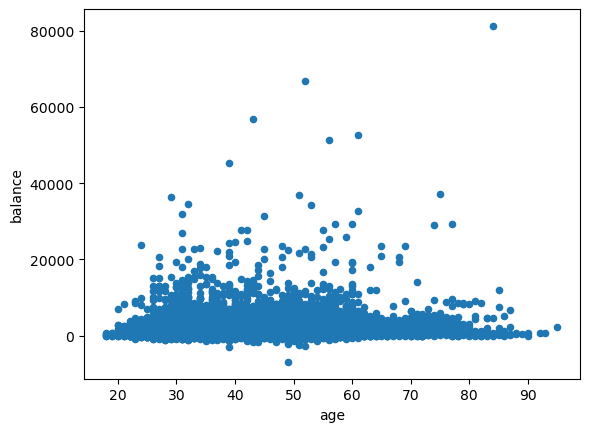

In [30]:
#Scatterplot showing age and balance
bank_with_dummies.plot(kind='scatter', x='age', y='balance');

#Across all ages, majority of people have savings of less than 20000.

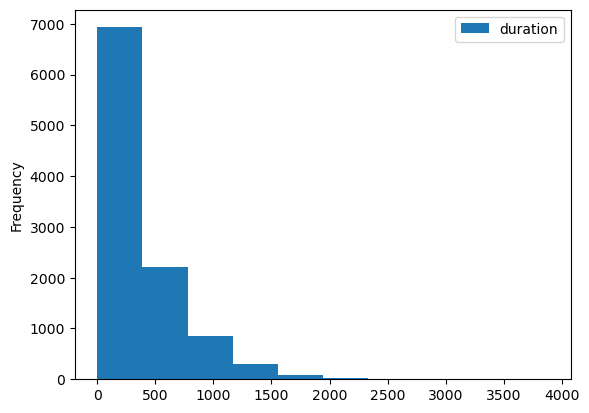

In [31]:
bank_with_dummies.plot(kind='hist', x='poutcome_success', y='duration');

In [32]:
#People who sign up to a term deposite
bank_with_dummies[bank_data.deposit_cat == 1].describe()

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,deposit_cat
count,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.0
mean,41.453178,1776.438983,562.252119,2.184110,63.226271,0.956992,0.011017,0.384534,0.098305,1.0
std,13.303152,3275.340245,401.715231,1.963807,122.317456,2.447857,0.104393,0.486536,0.297758,0.0
min,18.000000,-3058.000000,8.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,31.000000,204.000000,256.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,38.000000,732.500000,463.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,50.000000,2161.000000,761.000000,3.000000,92.000000,1.000000,0.000000,1.000000,0.000000,1.0
max,95.000000,81204.000000,3881.000000,32.000000,854.000000,58.000000,1.000000,1.000000,1.000000,1.0


In [36]:
#People signed up to a term deposite having a personal loan (loan_cat) and housing loan (housing_cat)
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.loan_cat) & (bank_with_dummies.housing_cat)])

259

In [35]:
#People signed up to a term deposite with a credit default 
len(bank_with_dummies[(bank_with_dummies.deposit_cat == 1) & (bank_with_dummies.default_cat ==1)])

52

<Axes: xlabel='job', ylabel='deposit_cat'>

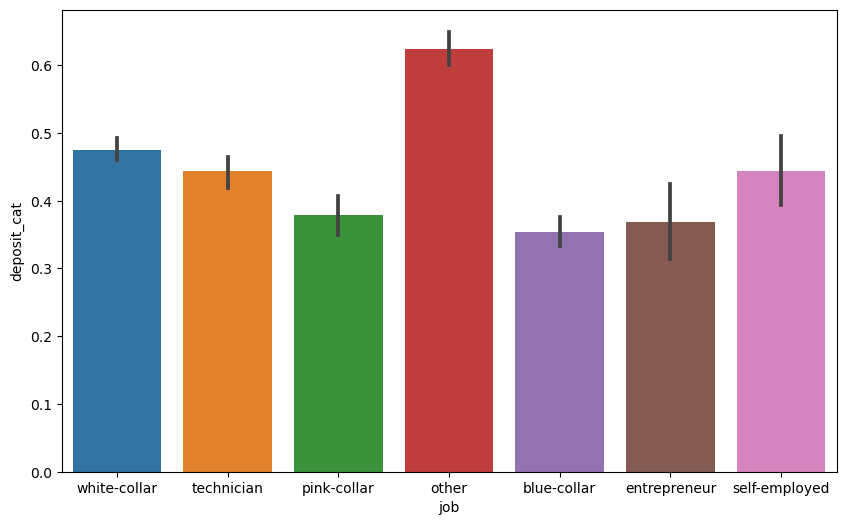

In [37]:
#Bar chart of job Vs deposite
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit_cat', data = bank_data)

<Axes: xlabel='poutcome', ylabel='duration'>

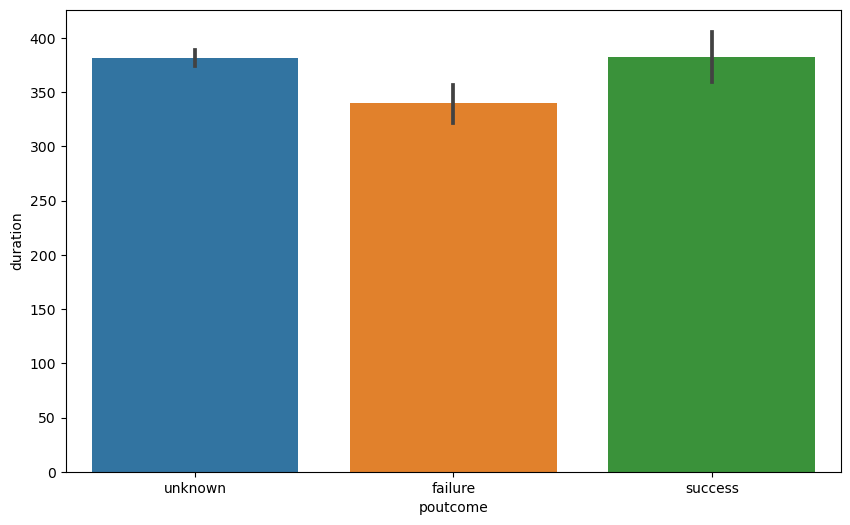

In [38]:
#Bar chart of "previous outcome" Vs "call duration"

plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = bank_data)

In [39]:
#Copying
bankcl = bank_with_dummies

In [40]:
#The Correlation matrix
corr = bankcl.corr()
corr

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,deposit_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.107765,-0.004359,0.000562,-0.005406,0.001025,-0.010779,-0.173184,-0.027736,0.026046,...,0.188770,0.307973,-0.460275,0.231650,-0.097722,-0.099491,0.073345,-0.007492,0.048132,-0.022604
balance,0.107765,1.000000,0.023397,-0.011541,0.009481,0.025442,-0.064688,-0.076615,-0.087884,0.078656,...,-0.024477,0.027646,-0.012481,-0.000732,-0.072217,0.071510,0.014338,0.005108,0.023817,-0.018684
duration,-0.004359,0.023397,1.000000,-0.044172,-0.022755,-0.020918,-0.011634,0.029736,-0.005399,0.476432,...,0.020550,-0.039807,0.028199,0.009242,0.001353,-0.001936,-0.014478,-0.037149,0.003697,0.029376
campaign,0.000562,-0.011541,-0.044172,1.000000,-0.095509,-0.039182,0.029958,0.001174,0.031710,-0.119116,...,-0.008355,0.051761,-0.049454,0.018727,-0.013785,-0.005565,0.014614,-0.083357,-0.067821,0.111741
pdays,-0.005406,0.009481,-0.022755,-0.095509,1.000000,0.513649,-0.032869,0.084504,-0.023341,0.129813,...,-0.014278,-0.021066,0.032435,-0.035650,0.019660,0.006553,-0.002611,0.627663,0.319099,-0.726049
previous,0.001025,0.025442,-0.020918,-0.039182,0.513649,1.000000,-0.030645,0.019575,-0.009071,0.103645,...,-0.021160,-0.011307,0.026805,-0.014532,-0.003728,0.022763,-0.018189,0.372966,0.251993,-0.468984
default_cat,-0.010779,-0.064688,-0.011634,0.029958,-0.032869,-0.030645,1.000000,0.007364,0.075154,-0.036928,...,0.019189,-0.006910,-0.005981,0.012206,-0.001561,-0.009961,0.005866,-0.026291,-0.030228,0.040564
housing_cat,-0.173184,-0.076615,0.029736,0.001174,0.084504,0.019575,0.007364,1.000000,0.067846,-0.190410,...,0.005604,0.032962,-0.039098,0.012104,0.121796,-0.115463,-0.054204,0.086766,-0.085880,-0.022108
loan_cat,-0.027736,-0.087884,-0.005399,0.031710,-0.023341,-0.009071,0.075154,0.067846,1.000000,-0.103075,...,0.024944,0.045726,-0.066192,0.003543,0.078839,-0.064808,-0.050437,0.003631,-0.056757,0.031081
deposit_cat,0.026046,0.078656,0.476432,-0.119116,0.129813,0.103645,-0.036928,-0.190410,-0.103075,1.000000,...,0.009420,-0.099999,0.100222,-0.058326,-0.051526,0.093201,0.011800,0.036593,0.222302,-0.164963


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

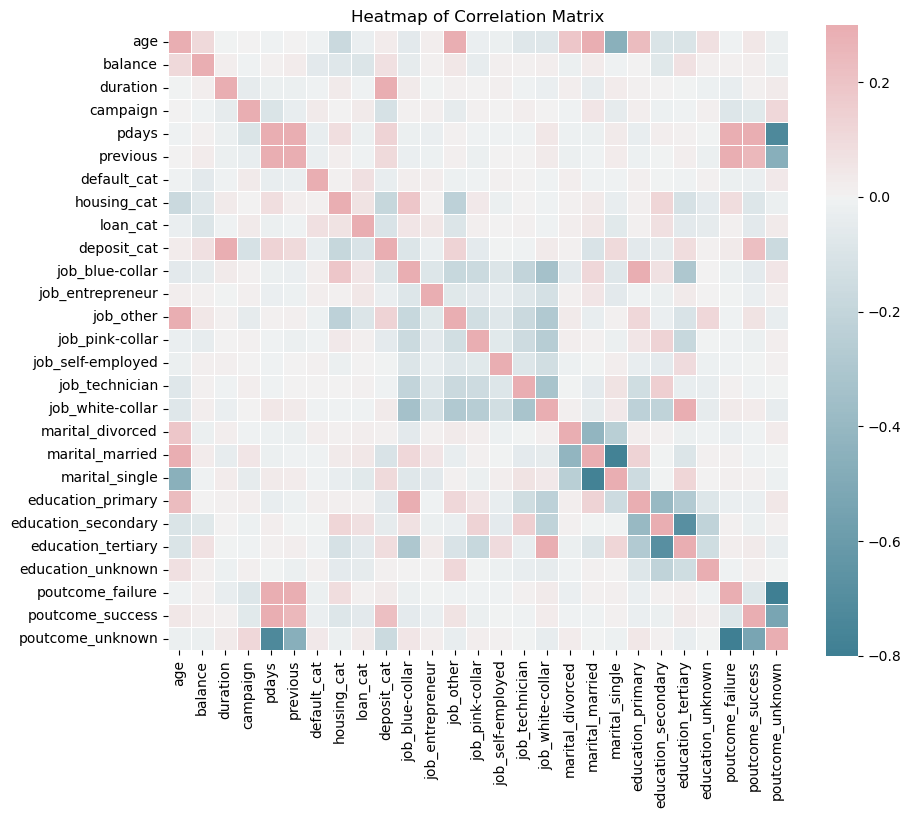

In [41]:
#Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [42]:
#Extracting the deposte_cat column (the dependent variable)
corr_deposite = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))
corr_deposite.sort_values(by = 'deposit_cat', ascending = False)

,deposit_cat
duration,0.476432
poutcome_success,0.222302
job_other,0.135527
pdays,0.129813
previous,0.103645
marital_single,0.100222
education_tertiary,0.093201
balance,0.078656
poutcome_failure,0.036593
job_white-collar,0.032503


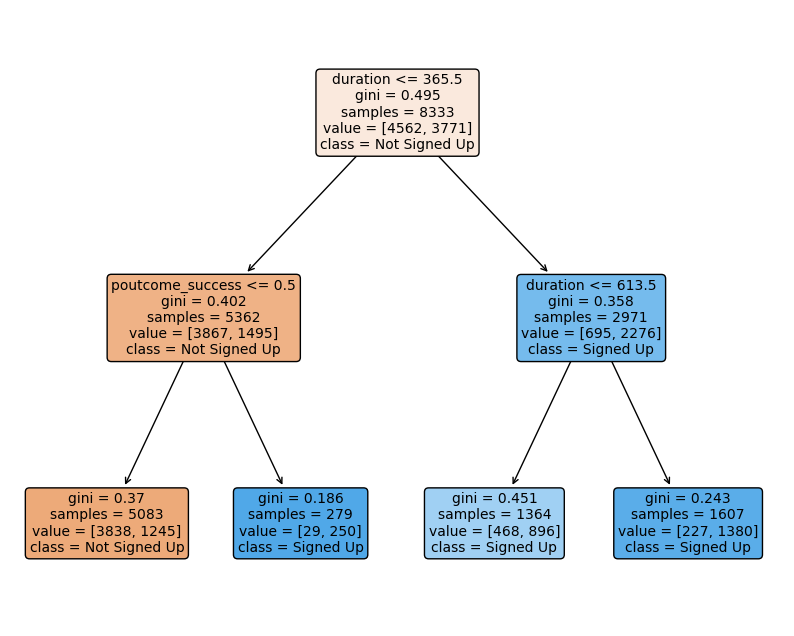

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train-Test split: 20% test data
data_drop_deposite = bankcl.drop('deposit_cat', axis=1)

label = bankcl.deposit_cat
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposite, label, test_size=0.2, random_state=50)

# Decision tree with depth = 2
dt2 = DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(data_train, label_train)

# Plotting the decision tree
plt.figure(figsize=(10, 8))
plot_tree(dt2,
          feature_names=data_drop_deposite.columns.tolist(),
          class_names=['Not Signed Up', 'Signed Up'],
          filled=True,  # Fill nodes with colors
          rounded=True,  # Round the boxes
          fontsize=10,  # Font size for the text in the tree
          )
plt.show()

In [54]:
#According to feature importance results, the most important feature is "Duration"
#Calculating statistics on duration
print("Mean duration   : ", data_drop_deposit.duration.mean())
print("Maximum duration: ", data_drop_deposit.duration.max())
print("Minimum duration: ", data_drop_deposit.duration.min())

Mean duration   :  376.7865028319094
Maximum duration:  3881
Minimum duration:  2


In [55]:
#Making predictions on the test set
preds = dt2.predict(data_test)

#Calculating accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))

#Making predictions on the test set using predict_proba
probs = dt2.predict_proba(data_test)[:,1]

#Calculating the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))


Accuracy score: 
0.7658349328214972

Area Under Curve: 
0.7739531062142854
